In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import holoviews as hv
import numpy as np
from gaussian import *
hv.notebook_extension()
%matplotlib inline

interval = 10
interval_size = 0.01

mpl.rcParams.update({'font.size':14})
mpl.rcParams['xtick.major.pad']='8'
mpl.rcParams['ytick.major.pad']='8'
mpl.rcParams['lines.linewidth'] = 4
plt.rc('text', usetex=True)

/home/martin/Documents/GP_Intro/gaussian.py:167: RuntimeWarning: covariance is not positive-semidefinite.
  y=np.random.multivariate_normal(mu, cov, samples).T


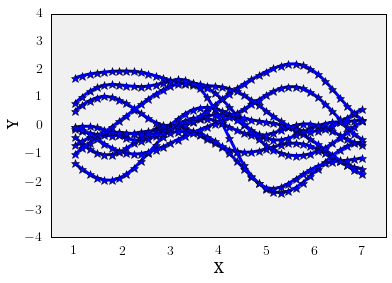

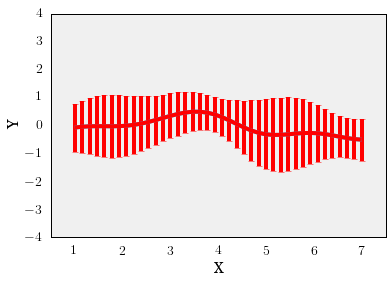

In [2]:
samples = 10
ndim =40
length = 7
sigma_v = 0
l=1
sigma_f=1
uniform=False
mean=0

dots=True
usecolors=False
lw=3
xname="X"
yname="Y"
ylim=4
filename="presentation5"

x,y,cov = genGP(samples=samples, ndim=ndim, length=length, sigma_v=sigma_v, l=l, sigma_f=sigma_f, uniform=uniform, dots=dots, lw=lw, xname=xname, yname=yname,ylim=ylim, mean=mean, usecolors=usecolors, filename=filename)

In [3]:
nsample=3
sample_x = np.random.uniform(1,length,nsample)
sample_x.sort()
sample_y = np.cos(sample_x)
sample_y.shape
y.shape

(40, 10)

In [4]:
mu,cov = inference(sample_x, sample_y, x, cov, ndim=ndim, length=length, sigma_v=sigma_v, l=l, sigma_f=sigma_f)

In [5]:
sample_x.shape
sample_y.shape
data = np.array((sample_x,sample_y))

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


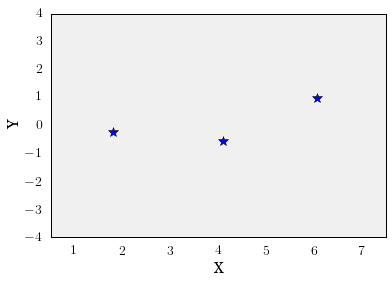

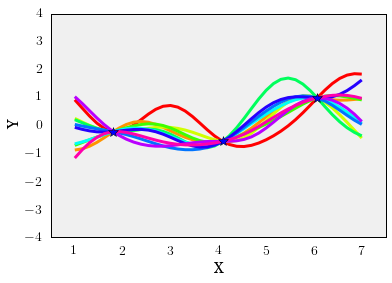

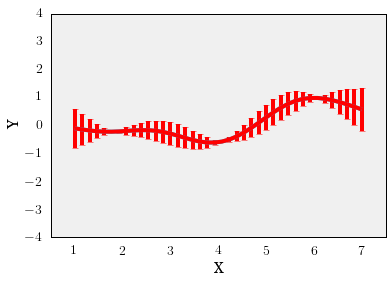

In [6]:
y=np.random.multivariate_normal(mu, cov, samples).T
plotGP(x,y,xlim=length,ylim=ylim,data=data,filename="presentation")


In [7]:
def k(i,j,sigma_f,l):
    return np.power(sigma_f,2)*np.exp(-(np.power((i[0]-j[0]),2)/(2*np.power(l,2)) + np.power((i[1]-j[1]),2)/(2*np.power(l,2))))

def direct_delta(i,j):
    if (i==j):
        return 1
    else:
        return 0

def sigma(ndim=6,length=6,uniform=False,sigma_v=0,l=1,sigma_f=1):
    if (uniform):
        x = np.random.uniform(1,length,ndim)
        x.sort()
        y = np.random.uniform(1,length,ndim)
        y.sort()
    else:
        x = np.linspace(1, length, ndim)
        y = np.linspace(1, length, ndim)
    [X,Y] = np.meshgrid(x,y)
    X = X.flatten()
    Y = Y.flatten()
    cov = np.zeros((ndim*ndim,ndim*ndim))
    for i in range(ndim*ndim):
        for j in range(ndim*ndim):
                    cov[i,j]=k((X[i],Y[i]),(X[j],Y[j]),sigma_f,l)
    return cov,X,Y

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: covariance is not positive-semidefinite.
/usr/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


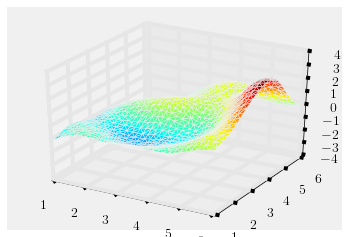

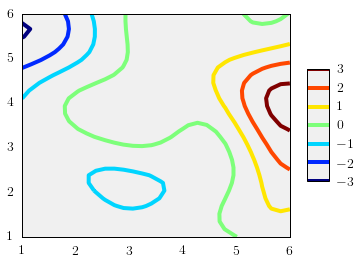

In [9]:
from matplotlib import cm

samples=1
ndim=30
cov,x,y = sigma(ndim,uniform=False)
mu=np.zeros(ndim*ndim)
z=np.random.multivariate_normal(mu, cov, samples).T
z = z.reshape(ndim,ndim).T
x = x.reshape(ndim,ndim).T
y = y.reshape(ndim,ndim).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x.flatten(),y.flatten(),z.flatten(), cmap=cm.jet)
fig.show()

fig = plt.figure()
surf = plt.contour(x,y,z,cmap=cm.jet)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()